## Customer Churn Prediction

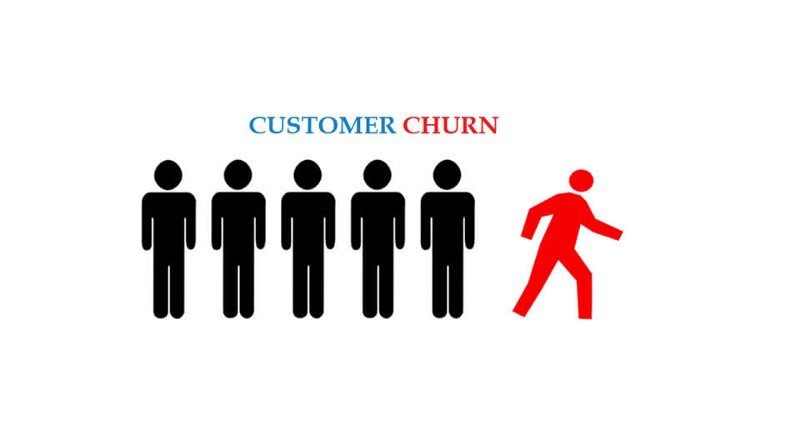

In [10]:
from IPython.display import Image
Image(filename='./datalab/Churn/Telecom/churn.jpg') 

In [119]:
df = pd.read_csv('./datalab/Churn/Telecom/Telco-Customer-Churn.csv')

<IPython.core.display.Javascript object>

In [120]:
df.columns = df.columns.map(lambda x : x.strip().lower())

In [121]:
df.head()

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [67]:
user_lost =  df[df.churn==1]['gender']
user_retain =  df[df.churn==0]['gender']
print('User Lost:\n{}'.format(user_lost.value_counts()))
print("*"*30)
print('User Retain:\n{}'.format(user_retain.value_counts()))

User Lost:
0    939
1    930
Name: gender, dtype: int64
******************************
User Retain:
1    2619
0    2544
Name: gender, dtype: int64


<IPython.core.display.Javascript object>

<AxesSubplot:xlabel='monthlycharges', ylabel='Count'>

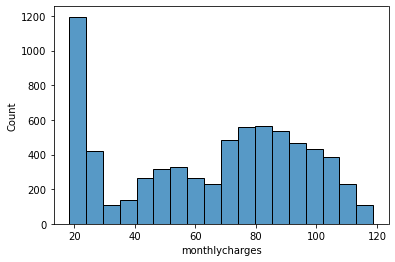

In [39]:
sns.histplot(df.monthlycharges)

In [122]:
df['totalcharges'] = pd.to_numeric(df['totalcharges'], errors="coerce")

<IPython.core.display.Javascript object>

In [124]:
df.dropna(axis=0, inplace=True)

In [40]:
le = LabelEncoder()

<IPython.core.display.Javascript object>

In [141]:
def encodeLabels(column):
    churnUser[column] = le.fit_transform(churnUser[column])

In [142]:
encodeLabels("gender")

F:\Anaconda3\lib\site-packages\pandas\core\frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


In [143]:
encodeLabels("partner")
encodeLabels("dependents")
encodeLabels("phoneservice")
encodeLabels("onlinesecurity")
encodeLabels("deviceprotection")
encodeLabels("techsupport")
encodeLabels("streamingtv")
encodeLabels("streamingmovies")

F:\Anaconda3\lib\site-packages\pandas\core\frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


In [130]:
encodeLabels("churn")

In [154]:
encodeLabels("onlinebackup")
encodeLabels("paperlessbilling")
encodeLabels("multiplelines")

F:\Anaconda3\lib\site-packages\pandas\core\frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


In [135]:
churnUser = df[df.churn == 1]

In [170]:
retainUser = df[df.churn == 0]

In [137]:
churnUser.drop(columns=['customerid'], inplace=True)

F:\Anaconda3\lib\site-packages\pandas\core\frame.py:4901: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [14]:
df.columns

Index(['gender', 'seniorcitizen', 'partner', 'dependents', 'tenure',
       'phoneservice', 'multiplelines', 'internetservice', 'onlinesecurity',
       'onlinebackup', 'deviceprotection', 'techsupport', 'streamingtv',
       'streamingmovies', 'contract', 'paperlessbilling', 'paymentmethod',
       'monthlycharges', 'totalcharges', 'churn'],
      dtype='object')

In [115]:
def filter_data(column):
    churnUser[column] = churnUser[column].map(lambda x : x.strip().split(' ')[0])

In [139]:
filter_data('multiplelines')
filter_data('internetservice')
filter_data('onlinesecurity')
filter_data('onlinebackup')
filter_data('deviceprotection')
filter_data('techsupport')
filter_data('streamingtv')
filter_data('streamingmovies')
filter_data('paymentmethod')


F:\Anaconda3\lib\site-packages\pandas\core\frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


In [165]:
churnUser.contract=pd.Categorical(churnUser.contract).codes
churnUser.internetservice=pd.Categorical(churnUser.internetservice).codes
churnUser.paymentmethod=pd.Categorical(churnUser.paymentmethod).codes

<IPython.core.display.Javascript object>

F:\Anaconda3\lib\site-packages\pandas\core\frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [166]:
churnUser.head()

,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
2,1,0,0,0,2,1,0,0,1,1,0,0,0,0,0,1,3,53.85,108.15,1
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1
5,0,0,0,0,8,1,1,1,0,0,1,0,1,1,0,1,2,99.65,820.50,1
8,0,0,1,0,28,1,1,1,0,0,1,1,1,1,0,1,2,104.80,3046.05,1
13,1,0,0,0,49,1,1,1,0,1,1,0,1,1,0,1,0,103.70,5036.30,1


In [167]:
churnUser.paperlessbilling.value_counts()

1    1400
0     469
Name: paperlessbilling, dtype: int64

In [171]:
retainUser.paperlessbilling.value_counts()

Yes    2768
No     2395
Name: paperlessbilling, dtype: int64

In [168]:
churnUser.paymentmethod.value_counts()

2    1071
3     308
0     258
1     232
Name: paymentmethod, dtype: int64

In [172]:
retainUser.paymentmethod.value_counts()

Mailed check                 1296
Electronic check             1294
Credit card (automatic)      1289
Bank transfer (automatic)    1284
Name: paymentmethod, dtype: int64

In [169]:
churnUser.contract.value_counts()

0    1655
1     166
2      48
Name: contract, dtype: int64

In [173]:
retainUser.contract.value_counts()

Month-to-month    2220
Two year          1637
One year          1306
Name: contract, dtype: int64

In [158]:
churnUser.streamingmovies.value_counts()

0    1051
1     818
Name: streamingmovies, dtype: int64

In [174]:
retainUser.streamingmovies.value_counts()

Yes                    1913
No                     1843
No internet service    1407
Name: streamingmovies, dtype: int64

In [145]:
churnUser.streamingtv.value_counts()

0    1055
1     814
Name: streamingtv, dtype: int64

In [175]:
retainUser.streamingtv.value_counts()

Yes                    1889
No                     1867
No internet service    1407
Name: streamingtv, dtype: int64

In [146]:
churnUser.techsupport.value_counts()

0    1559
1     310
Name: techsupport, dtype: int64

In [176]:
retainUser.techsupport.value_counts()

No                     2026
Yes                    1730
No internet service    1407
Name: techsupport, dtype: int64

In [147]:
churnUser.deviceprotection.value_counts()

0    1324
1     545
Name: deviceprotection, dtype: int64

In [177]:
retainUser.deviceprotection.value_counts()

No                     1883
Yes                    1873
No internet service    1407
Name: deviceprotection, dtype: int64

In [156]:
churnUser.onlinebackup.value_counts()

0    1346
1     523
Name: onlinebackup, dtype: int64

In [178]:
retainUser.onlinebackup.value_counts()

Yes                    1902
No                     1854
No internet service    1407
Name: onlinebackup, dtype: int64

In [149]:
churnUser.onlinesecurity.value_counts()

0    1574
1     295
Name: onlinesecurity, dtype: int64

In [157]:
churnUser.multiplelines.value_counts()

0    1019
1     850
Name: multiplelines, dtype: int64

In [179]:
retainUser.multiplelines.value_counts()

No                  2536
Yes                 2117
No phone service     510
Name: multiplelines, dtype: int64

In [151]:
churnUser.internetservice.value_counts()

Fiber    1297
DSL       459
No        113
Name: internetservice, dtype: int64

In [180]:
retainUser.internetservice.value_counts()

DSL            1957
Fiber optic    1799
No             1407
Name: internetservice, dtype: int64

In [152]:
churnUser.phoneservice.value_counts()

1    1699
0     170
Name: phoneservice, dtype: int64

In [181]:
retainUser.phoneservice.value_counts()

Yes    4653
No      510
Name: phoneservice, dtype: int64

In [153]:
churnUser.gender.value_counts()

0    939
1    930
Name: gender, dtype: int64

In [106]:
churnUser.seniorcitizen.value_counts()

0    1393
1     476
Name: seniorcitizen, dtype: int64

In [182]:
retainUser.seniorcitizen.value_counts()

0    4497
1     666
Name: seniorcitizen, dtype: int64

In [107]:
churnUser.partner.value_counts()

0    1200
1     669
Name: partner, dtype: int64

In [183]:
retainUser.partner.value_counts()

Yes    2724
No     2439
Name: partner, dtype: int64

In [184]:
retainUser.tenure.value_counts()[:10]

72    356
1     233
71    164
2     115
70    108
3     106
4      93
68     91
67     88
69     87
Name: tenure, dtype: int64

In [185]:
churnUser.tenure.value_counts()[:10]

1     380
2     123
3      94
4      83
5      64
7      51
9      46
10     45
8      42
6      40
Name: tenure, dtype: int64

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

F:\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='tenure', ylabel='count'>

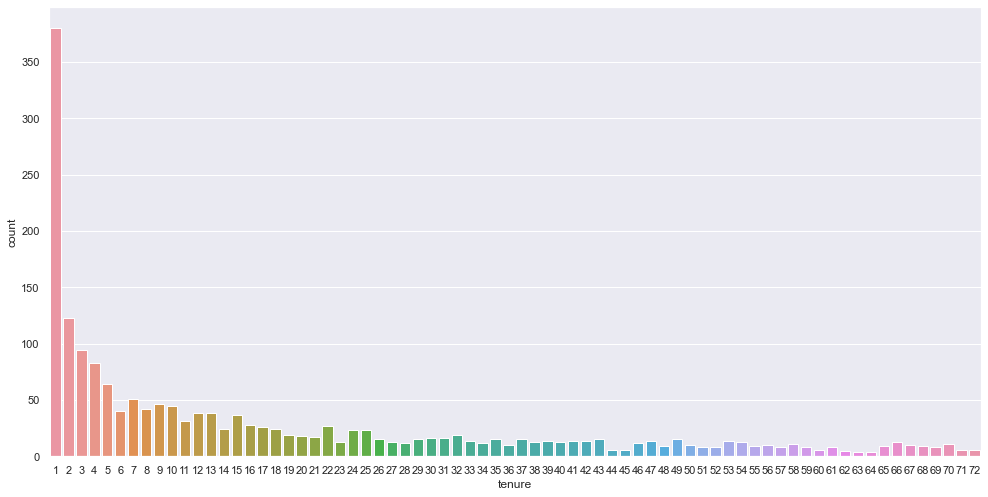

In [86]:
sns.set(rc={'figure.figsize':(16.7,8.27)})
sns.countplot(churnUser.tenure)

<IPython.core.display.Javascript object>

<AxesSubplot:xlabel='tenure', ylabel='Count'>

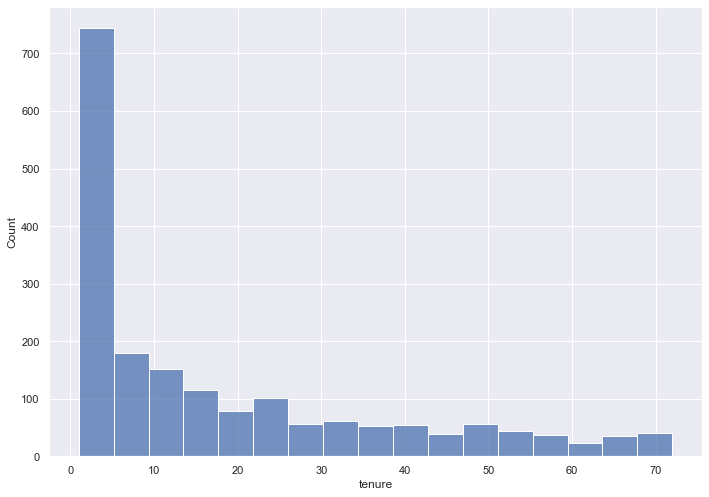

In [84]:
sns.histplot(churnUser.tenure)

In [97]:
churnUser.contract.value_counts()

Month-to-month    1655
One year           166
Two year            48
Name: contract, dtype: int64

<IPython.core.display.Javascript object>

<AxesSubplot:xlabel='tenure', ylabel='monthlycharges'>

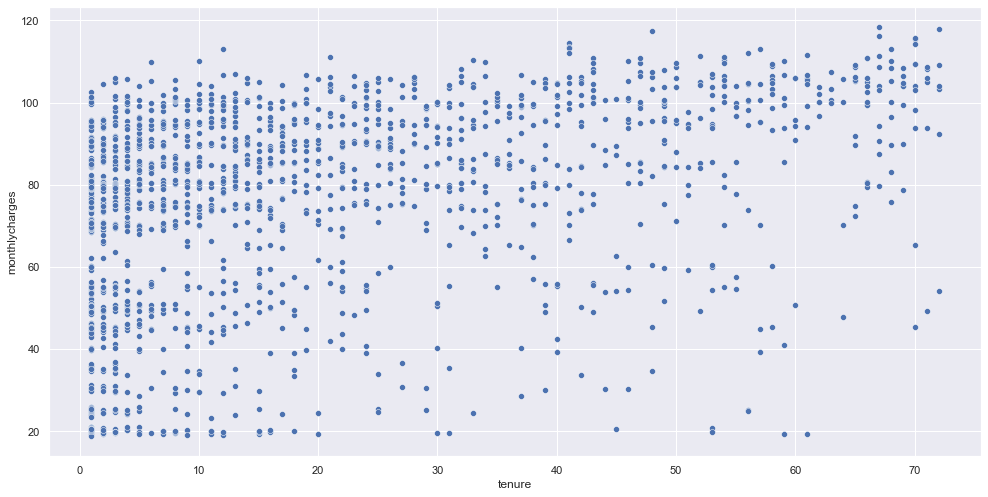

In [89]:
sns.scatterplot(x=churnUser.tenure, y=churnUser.monthlycharges)

In [95]:
churnUser[churnUser.tenure > 10].contract.value_counts()

Month-to-month    694
One year          159
Two year           48
Name: contract, dtype: int64

<IPython.core.display.Javascript object>

<AxesSubplot:xlabel='tenure', ylabel='totalcharges'>

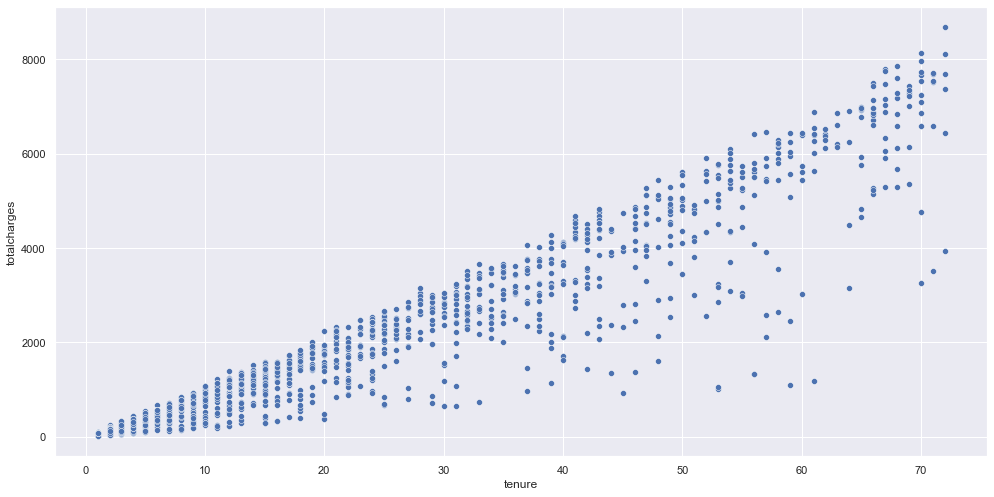

In [93]:
sns.scatterplot(x=churnUser.tenure, y=churnUser.totalcharges)